# Phase 1 Project

## Business Understanding

#### which aircraft has the lowest risk for a company to start a new business endeavor with?

Selecting the right aircraft to start a business is a crucial decision, as choosing an aircraft with a high risk profile can result in operational disruptions, financial losses, and reputational damage. Therefore, it is essential to which aircraft are likely to pose the lowest risk for purchase.

in this analysis we will be looking at previous aricrafts accidents to be able to make reccomandations on which aircrafts carry the  lowest risk

### Main Objective

* Find Which aircraft carries the lowest risk when purchased

## Data Understanding

The Data that was used for this analysis will be pulled from one file 

`aviaitonData.csv`

* **Source**: This dataset can be found in [`kaggle`](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data) which is a platform with thousands of datasets from all sorts of topics 
* **Contents**: The Data conatns various columns of diffrent information about the aircafts involved in the accident and the locations involved 
* **Format**: The data is stored in a csv file (comma separated value )

First we import the relevant libaries needed for the analysis

In [3]:
# import all relevant libraries need fot analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Read the relevant dataset need for analysis

In [5]:
df = pd.read_csv('./AviationData 2.csv')


/var/folders/7t/vyxz37tj3n34ncjhhzlfg_p40000gp/T/ipykernel_18255/1419934424.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./AviationData 2.csv')


## Data Exploration

We will have to look at various aspects of the dataset to have a better understaning of it to see what can help us in the analysis

First thing is to find number of rows and columns in the dataset 

In [8]:
df.shape
print("Number of rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of rows:  88889
Number of Columns:  31


we then preview the top and the bottom of the dataset 

In [10]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,2.02212E+13,Accident,ERA23LA093,26/12/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29/12/2022
88885,2.02212E+13,Accident,ERA23LA095,26/12/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,26/12/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27/12/2022
88887,2.02212E+13,Accident,WPR23LA076,26/12/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,2.02212E+13,Accident,ERA23LA097,29/12/2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30/12/2022


In [11]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/04/1980


we then need to find out the information about the data set to check if any columns contain null values and if the data types are what want them to be 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

As shown above we can observe that many columns contain null values 

## Data Wrangling

### Consintancy

In [17]:
columns_to_drop = [
    'Event.Id', 'Investigation.Type', 'Accident.Number',
    'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
    'Airport.Name', 'Registration.Number', 'Schedule', 'Air.carrier', 'Purpose.of.flight',
    'Amateur.Built','Injury.Severity','Weather.Condition','FAR.Description','Publication.Date','Report.Status'
]
df = df.drop(columns=columns_to_drop)

The above columns were dropped since they contain infromation that is irrelevant, redundant or unnecessary  not needed in the analysis process

#### Duplicates

It is important to remove duplicates to maintain data quality and consitency during analysis 

In [21]:
#Checking for duplicates 
df.duplicated().sum()

149

As seen above there is 103 rows of duplicates which need to be dropped

In [23]:
df =df.drop_duplicates()
df.duplicated().sum()

0

The `Make` Column may need to be investigated for cassing issues

In [25]:
df['Make'].value_counts()

Make
Cessna             22159
Piper              12015
CESSNA              4904
Beech               4330
PIPER               2834
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

As seen above in the `Make` column there seems to be some inconsitency in the casing in the values which may make our analysis inaccurate

In [27]:
df["Make"] = df["Make"].str.lower()

### Completeness

Finding and dealing with rows with null values in nessesery for proper analysis

In [30]:
df.isna().sum()

Event.Date                    0
Aircraft.damage            3189
Aircraft.Category         56515
Make                         63
Model                        92
Number.of.Engines          6073
Engine.Type                7086
Total.Fatal.Injuries      11394
Total.Serious.Injuries    12499
Total.Minor.Injuries      11921
Total.Uninjured            5907
Broad.phase.of.flight     27117
dtype: int64

In [31]:
df.isna().mean()*100

Event.Date                 0.000000
Aircraft.damage            3.593644
Aircraft.Category         63.686049
Make                       0.070994
Model                      0.103674
Number.of.Engines          6.843588
Engine.Type                7.985125
Total.Fatal.Injuries      12.839757
Total.Serious.Injuries    14.084967
Total.Minor.Injuries      13.433626
Total.Uninjured            6.656525
Broad.phase.of.flight     30.557809
dtype: float64

As seen above most rows contain null values

espesially in the `Aircraft.category` and `Broad.phase.of.flight` columns where it will not be advisable to drop the rows since the percentage of null rows is very significant and the columns should not be dropped since the information is relevant to the analysis the best path to take in this situation is to use the mode to fill in the null values since both columns are categorical data

In [33]:
df['Aircraft.Category'].fillna(df['Aircraft.Category'].mode()[0], inplace=True)
df['Broad.phase.of.flight'].fillna(df['Broad.phase.of.flight'].mode()[0], inplace=True)
print("Number of nulls in Aircraft category:", df["Aircraft.Category"].isna().sum())
print("Number of nulls in Borad Phase Of Flight:", df["Broad.phase.of.flight"].isna().sum())


Number of nulls in Aircraft category: 0
Number of nulls in Borad Phase Of Flight: 0


the rest of the rows containing null values will have to be dropped since there is no appropirate way to impute them

In [35]:
df = df.dropna()

As seen eariler columns like `Event.Date`  may need their data types changed to the `datetime` data type for later  analysis

In [37]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Event.Date'].head()

/var/folders/7t/vyxz37tj3n34ncjhhzlfg_p40000gp/T/ipykernel_18255/4199807135.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Event.Date'] = pd.to_datetime(df['Event.Date'])


0   1948-10-24
1   1962-07-19
3   1977-06-19
6   1981-08-01
7   1982-01-01
Name: Event.Date, dtype: datetime64[ns]

In [38]:
plt.bar(x = )

SyntaxError: invalid syntax (1986522606.py, line 1)

In [ ]:
df.groupby('Aircraft.Category')['Total.Fatal.Injuries'].sum()

## Data Analysis

**Now that the data has been cleaned and validated it is time for analysing the data which will be doen in three steps**

### Univariate Analysis


### Bivariate Analysis


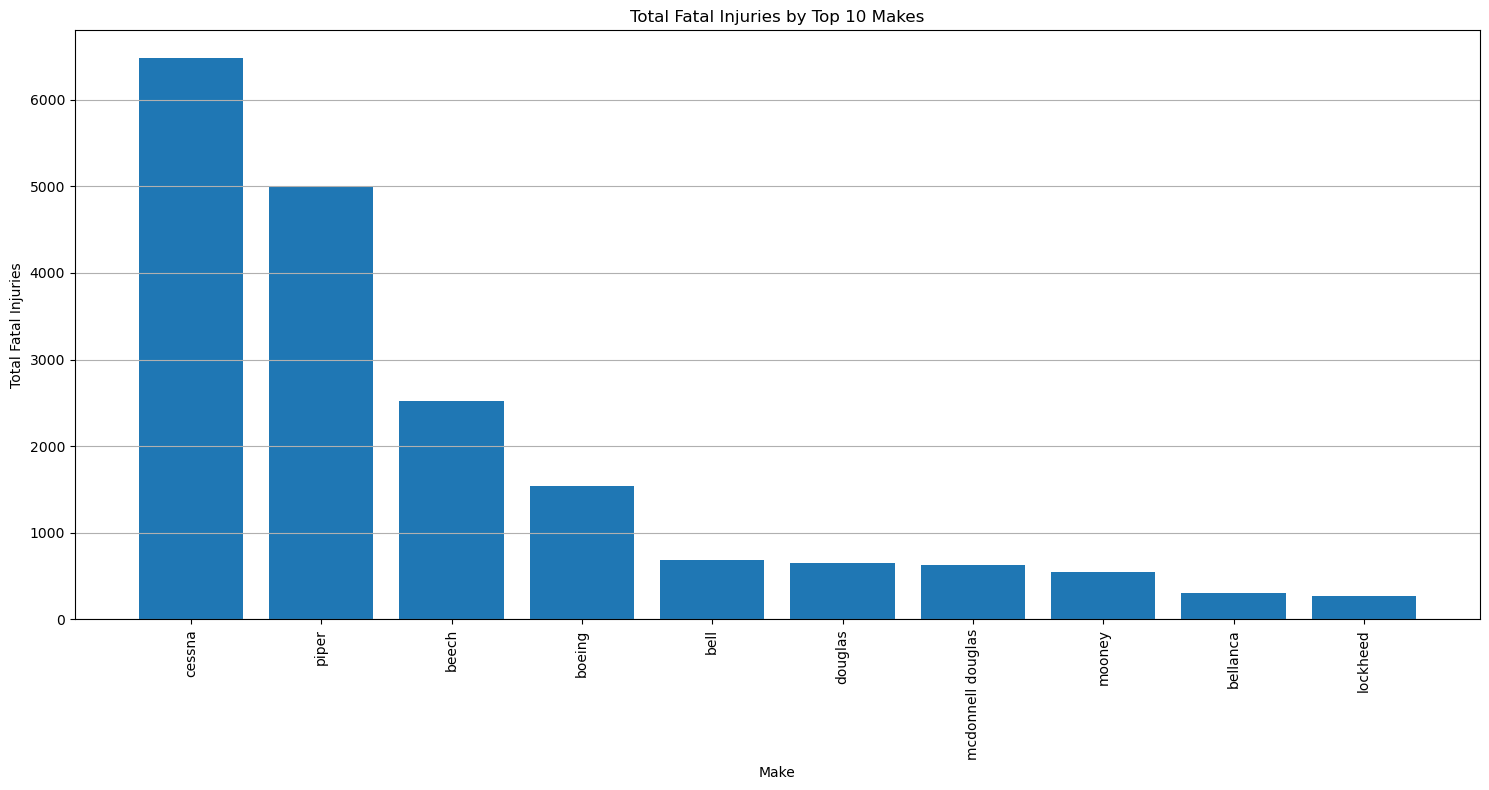

In [59]:
# Group the data by Make and calculate the sum of Total.Fatal.Injuries for each Make
fatal_injuries_by_make = df.groupby('Make')['Total.Fatal.Injuries'].sum()

# Convert the groupby result to a DataFrame for easier sorting
fatal_injuries_by_make = fatal_injuries_by_make.reset_index()

# Sort the DataFrame by Total.Fatal.Injuries to find the top 10 makes
top_10_makes = fatal_injuries_by_make.sort_values(by='Total.Fatal.Injuries', ascending=False).head(10)

# Create a bar chart for the top 10 makes
plt.figure(figsize=(15, 8))
plt.bar(top_10_makes['Make'], top_10_makes['Total.Fatal.Injuries'])
plt.title('Total Fatal Injuries by Top 10 Makes')
plt.xlabel('Make')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines along the y-axis
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [53]:
df['Make'].value_counts().head()

Make
cessna    21604
piper     11930
beech      4113
bell       1938
mooney     1038
Name: count, dtype: int64

### multivariate Analysis

## Observations

## reccomandations